In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
red_wine = pd.read_csv("winequality-red.csv", sep= ";")
white_wine = pd.read_csv("winequality-white.csv", sep= ";")

In [3]:
red_wine["color"]= "Red"
white_wine["color"]= "White"

In [4]:
wine = pd.concat([red_wine, white_wine])

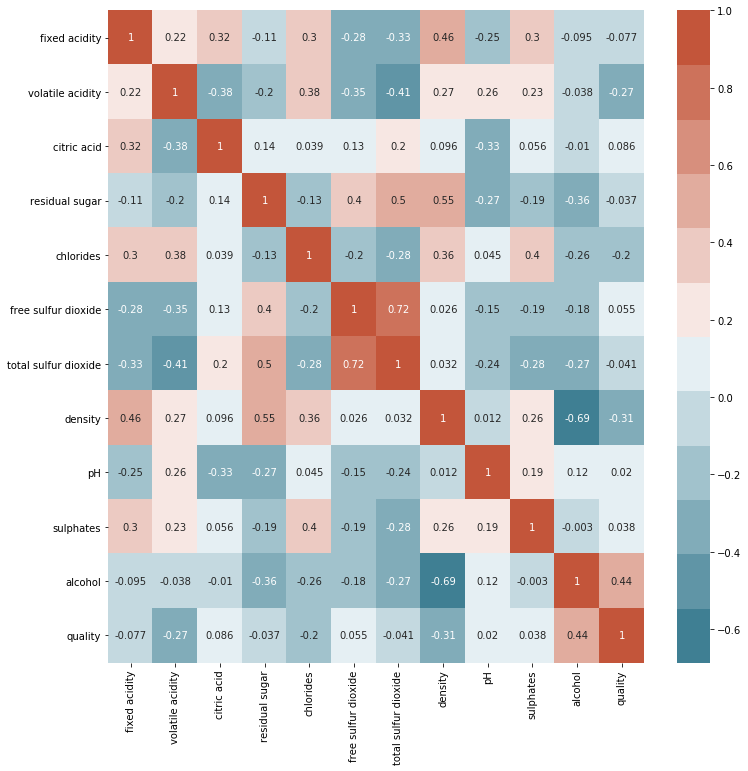

In [5]:
plt.figure(figsize=(12, 12))
df_corr = wine.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.show()

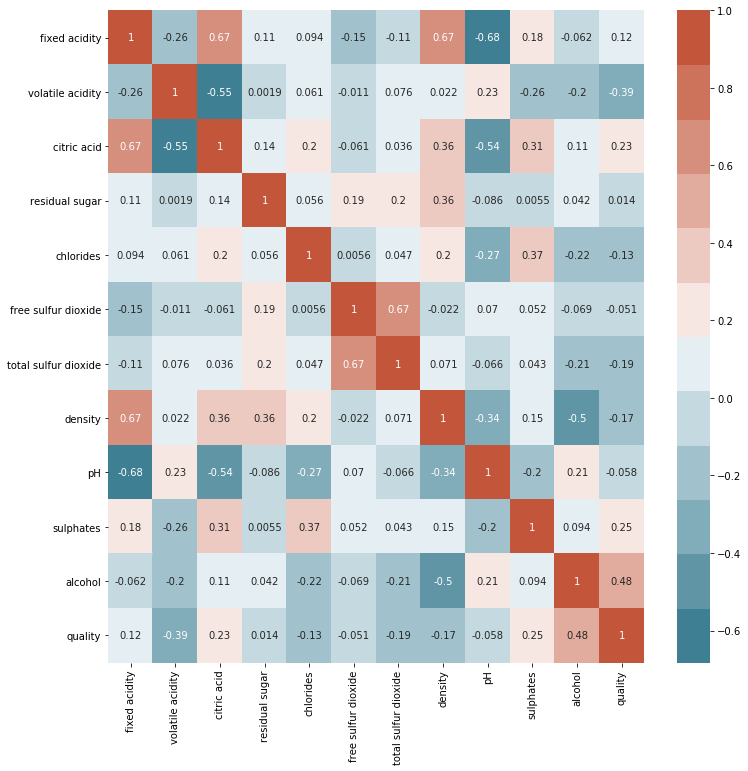

In [6]:
plt.figure(figsize=(12, 12))
df_corr = red_wine.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.show()

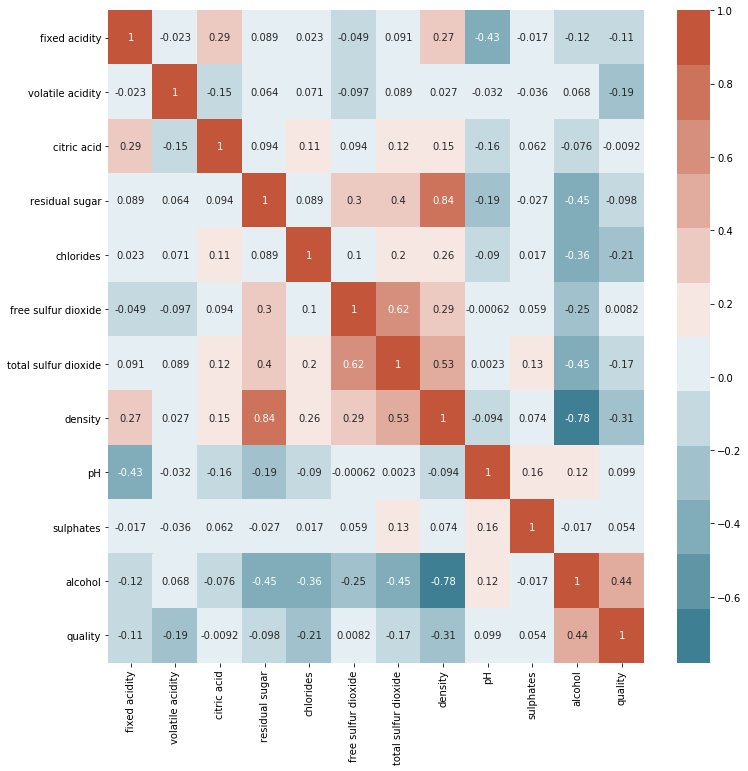

In [7]:
plt.figure(figsize=(12, 12))
df_corr = white_wine.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.show()

In [8]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [11]:
color_dict = {"white": "#FCF5DB", "red": "#BD1414"}

'The Correlaton between quality of White Wine and alcohol is: 0.44'

'The Correlaton between quality of Red Wine and alcohol is: 0.48'

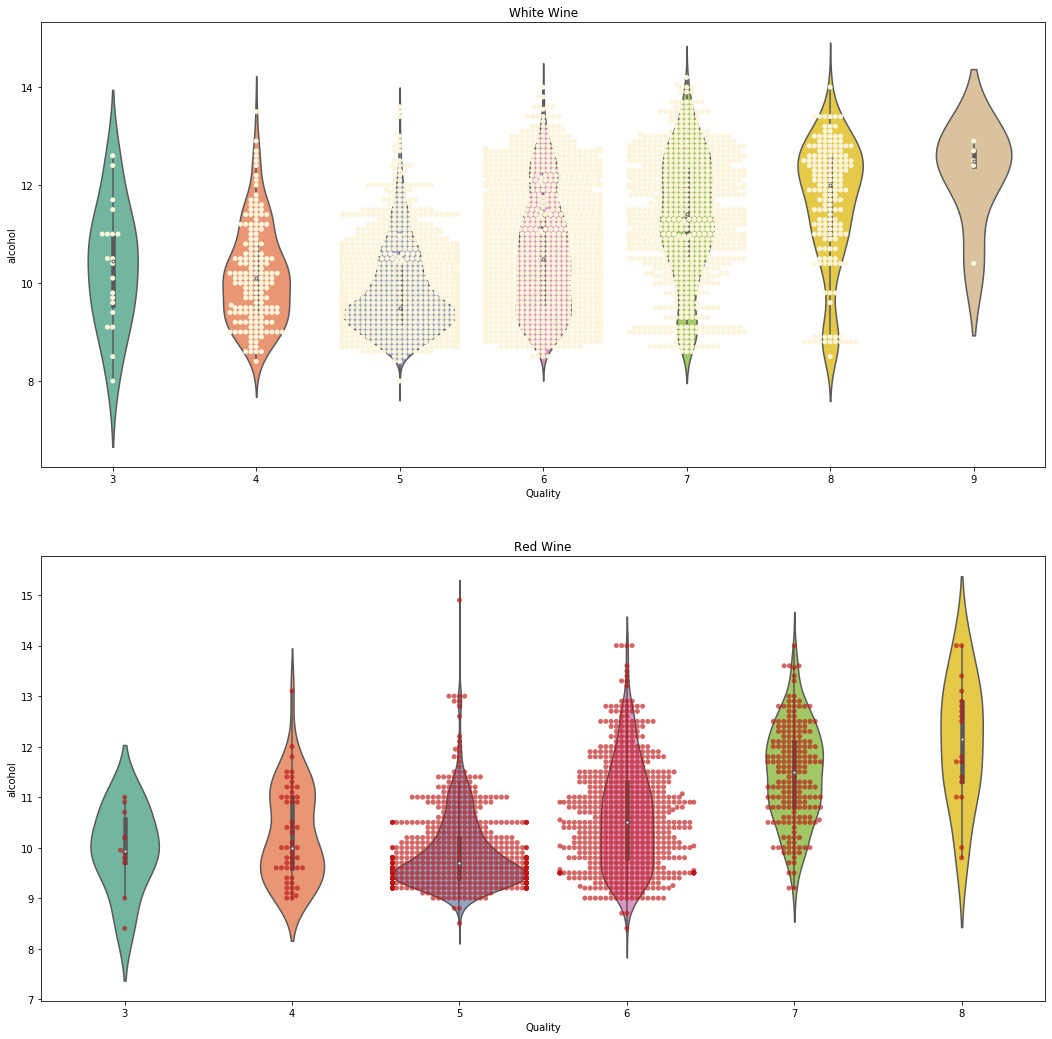

In [18]:
fig,ax = plt.subplots(2,1, figsize= (18, 18))
white = sns.swarmplot(x= "quality", y= "alcohol",data= white_wine, color= color_dict["white"], ax=ax[0])
white = sns.violinplot(x= "quality", y= "alcohol",data= white_wine, palette="Set2", ax=ax[0])
red = sns.swarmplot(x= "quality", y= "alcohol",color= color_dict["red"],alpha= .65, data= red_wine, ax=ax[1])
red = sns.violinplot(x= "quality", y= "alcohol",data= red_wine, palette="Set2", ax=ax[1])
white.set_xlabel("Quality")
white.set_title("White Wine")
red.set_xlabel("Quality")
red.set_title("Red Wine")
display("The Correlaton between quality of White Wine and alcohol is: " +
        str(white_wine["alcohol"].corr(white_wine["quality"]).round(2)))
display("The Correlaton between quality of Red Wine and alcohol is: " +
        str(red_wine["alcohol"].corr(red_wine["quality"]).round(2)))
plt.show()

In [ ]:
fig,ax = plt.subplots(2,1, figsize= (18, 18))
white = sns.swarmplot(x= "quality", y= "volatile acidity",data= white_wine, color= color_dict["white"], ax=ax[0])
white = sns.violinplot(x= "quality", y= "volatile acidity",data= white_wine, palette="Set2", ax=ax[0])
red = sns.swarmplot(x= "quality", y= "volatile acidity",color= color_dict["red"],alpha= .65, data= red_wine, ax=ax[1])
red = sns.violinplot(x= "quality", y= "volatile acidity",data= red_wine, palette="Set2", ax=ax[1])
white.set_xlabel("Quality")
white.set_title("White Wine")
white.set_ylabel("Volatile Acidity")
red.set_xlabel("Quality")
red.set_title("Red Wine")
red.set_ylabel("Volatile Acidity")
display("The Correlaton between quality of White Wine and volatile acidity is: " +
        str(white_wine["volatile acidity"].corr(white_wine["quality"]).round(2)))
display("The Correlaton between quality of Red Wine and volatile acidity is: " +
        str(red_wine["volatile acidity"].corr(red_wine["quality"]).round(2)))
plt.show()

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [84]:
X = red_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = red_wine[["quality"]]

In [133]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)
y = scalar.fit_transform(y)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [87]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [165]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_scaled, y_train)

pred = model.predict(X_test)
print_evaluate(y_test, pred)

MAE: 0.6229955665087529
MSE: 0.598449525818015
RMSE: 0.7735951950587691
R2 Square 0.4031487546543435


In [164]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print_evaluate(y_test, pred)

MAE: 0.7267443061561336
MSE: 0.8684591500984643
RMSE: 0.9319115570151839
R2 Square 0.133860245674715


In [163]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print_evaluate(y_test, pred)

MAE: 0.6237433944624415
MSE: 0.5984354022502426
RMSE: 0.7735860664788647
R2 Square 0.40316284050227225


In [154]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(X_train, y_train.ravel())
pred = model.predict(X_test)

print_evaluate(y_test, pred)

MAE: 0.6386343075930745
MSE: 0.6054211666851266
RMSE: 0.778088148402947
R2 Square 0.39619573296391675


In [153]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train.ravel())
pred = model.predict(X_test)

print_evaluate(y_test, pred)

MAE: 0.6018337236169583
MSE: 0.5601502539660874
RMSE: 0.7484318632755339
R2 Square 0.4413457405562191


In [149]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print_evaluate(y_test, pred)

MAE: 0.5123840358381683
MSE: 0.5226895976529932
RMSE: 0.7229727502838493
R2 Square 0.4787063506116359


In [147]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train.ravel())
pred = model.predict(X_test)

print_evaluate(y_test, pred)

MAE: 0.5267835494773012
MSE: 0.47685985650599766
RMSE: 0.6905504011337605
R2 Square 0.5244136941675758


In [146]:
print('Performance on training data using DT:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',model.score(X_test,y_test))

Performance on training data using DT: 0.9253853974476308
Performance on testing data using DT: 0.5153869005812998


In [37]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [72]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [73]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [105]:
base_model = RandomForestRegressor(n_estimators = 600,min_samples_split= 2,  min_samples_leaf=  2,
                                   max_features= 'sqrt', max_depth= 110, bootstrap= False, random_state = 43)
base_model.fit(X_train, y_train.ravel())
pred = base_model.predict(X_test)

print_evaluate(y_test, pred)

MAE: 0.5004525437912577
MSE: 0.4509360756495135
RMSE: 0.6715177403833151
R2 Square 0.5502682403251837
